In [1]:
#Importation des bibliothèques
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Chargement des données
df=pd.read_csv('Auto Sales data.csv', parse_dates=['ORDERDATE'], dayfirst=True)

In [3]:
#Affichage des échantillons de données
df.head(20)

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0         10107               30      95.70                2  2871.00   
1         10121               34      81.35                5  2765.90   
2         10134               41      94.74                2  3884.34   
3         10145               45      83.26                6  3746.70   
4         10168               36      96.66                1  3479.76   
5         10180               29      86.13                9  2497.77   
6         10188               48     114.84                1  5512.32   
7         10211               41     114.84               14  4708.44   
8         10223               37     107.18                1  3965.66   
9         10237               23     101.44                7  2333.12   
10        10251               28     113.88                2  3188.64   
11        10263               34     108.14                2  3676.76   
12        10275               45      92.83                1  4177.35   
13        10285               36     113.88                6  4099.68   
14        10299               23     112.93                9  2597.39   
15        10309               41     107.18                5  4394.38   
16        10318               46      94.74                1  4358.04   
17        10329               42     104.67                1  4396.14   
18        10341               41     188.73                9  7737.93   
19        10361               20      72.55               13  1451.00   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  2021-02-24                   828  Shipped  Motorcycles    95    S10_1678   
1  2021-05-07                   757  Shipped  Motorcycles    95    S10_1678   
2  2021-07-01                   703  Shipped  Motorcycles    95    S10_1678   
3  2021-08-25                   649  Shipped  Motorcycles    95    S10_1678   
4  2021-10-28                   586  Shipped  Motorcycles    95    S10_1678   
5  2021-11-11                   573  Shipped  Motorcycles    95    S10_1678   
6  2021-11-18                   567  Shipped  Motorcycles    95    S10_1678   
7  2022-01-15                   510  Shipped  Motorcycles    95    S10_1678   
8  2022-02-20                   475  Shipped  Motorcycles    95    S10_1678   
9  2022-04-05                   432  Shipped  Motorcycles    95    S10_1678   
10 2022-05-18                   390  Shipped  Motorcycles    95    S10_1678   
11 2022-06-28                   350  Shipped  Motorcycles    95    S10_1678   
12 2022-07-23                   326  Shipped  Motorcycles    95    S10_1678   
13 2022-08-27                   292  Shipped  Motorcycles    95    S10_1678   
14 2022-09-30                   259  Shipped  Motorcycles    95    S10_1678   
15 2022-10-15                   245  Shipped  Motorcycles    95    S10_1678   
16 2022-11-02                   228  Shipped  Motorcycles    95    S10_1678   
17 2022-11-15                   216  Shipped  Motorcycles    95    S10_1678   
18 2022-11-24                   208  Shipped  Motorcycles    95    S10_1678   
19 2022-12-17                   186  Shipped  Motorcycles    95    S10_1678   

                  CUSTOMERNAME             PHONE  \
0            Land of Toys Inc.        2125557818   
1           Reims Collectables        26.47.1555   
2              Lyon Souveniers  +33 1 46 62 7555   
3            Toys4GrownUps.com        6265557265   
4         Technics Stores Inc.        6505556809   
5     Daedalus Designs Imports        20.16.1555   
6                 Herkku Gifts     +47 2267 3215   
7             Auto Canal Petit    (1) 47.55.6555   
8   Australian Collectors, Co.      03 9520 4555   
9              Vitachrome Inc.        2125551500   
10     Tekni Collectables Inc.        2015559350   
11             Gift Depot Inc.        2035552570   
12           La Rochelle Gifts        40.67.8555   
13        Marta's Replicas Co.        6175558555   
14        Toys of Finland, Co.

In [4]:

# Suppression de la colonne 'DAYS_SINCE_LASTORDER'
df = df.drop('DAYS_SINCE_LASTORDER', axis=1)

# Création d'une nouvelle fonctionnalité 'DAYS_SINCE_LASTORDER' basée sur la différence de temps 
from datetime import datetime
temp_date = datetime(2024, 1, 1)  # Define the specific date
df['DAYS_SINCE_LASTORDER'] = (temp_date- df['ORDERDATE']).dt.days

In [5]:
df

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10168               36      96.66                1  3479.76   
...           ...              ...        ...              ...      ...   
2742        10350               20     112.22               15  2244.40   
2743        10373               29     137.19                1  3978.51   
2744        10386               43     125.99                4  5417.57   
2745        10397               34      62.24                1  2116.16   
2746        10414               47      65.52                9  3079.44   

      ORDERDATE    STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0    2021-02-24   Shipped  Motorcycles    95    S10_1678   
1    2021-05-07   Shipped  Motorcycles    95    S10_1678   
2    2021-07-01   Shipped  Motorcycles    95    S10_1678   
3    2021-08-25   Shipped  Motorcycles    95    S10_1678   
4    2021-10-28   Shipped  Motorcycles    95    S10_1678   
...         ...       ...          ...   ...         ...   
2742 2022-12-02   Shipped        Ships    54    S72_3212   
2743 2023-01-31   Shipped        Ships    54    S72_3212   
2744 2023-03-01  Resolved        Ships    54    S72_3212   
2745 2023-03-28   Shipped        Ships    54    S72_3212   
2746 2023-05-06   On Hold        Ships    54    S72_3212   

                 CUSTOMERNAME             PHONE  \
0           Land of Toys Inc.        2125557818   
1          Reims Collectables        26.47.1555   
2             Lyon Souveniers  +33 1 46 62 7555   
3           Toys4GrownUps.com        6265557265   
4        Technics Stores Inc.        6505556809   
...                       ...               ...   
2742    Euro Shopping Channel    (91) 555 94 44   
2743  Oulu Toy Supplies, Inc.        981-443655   
2744    Euro Shopping Channel    (91) 555 94 44   
2745             Alpha Cognac        61.77.6555   
2746        Gifts4AllAges.com        6175559555   

                       ADDRESSLINE1        CITY POSTALCODE  COUNTRY  \
0           897 Long Airport Avenue         NYC      10022      USA   
1                59 rue de l'Abbaye       Reims      51100   France   
2     27 rue du Colonel Pierre Avia       Paris      75508   France   
3                78934 Hillside Dr.    Pasadena      90003      USA   
4                 9408 Furth Circle  Burlingame      94217      USA   
...                             ...         ...        ...      ...   
2742             C/ Moralzarzal, 86      Madrid      28034    Spain   
2743                    Torikatu 38        Oulu      90110  Finland   
2744             C/ Moralzarzal, 86      Madrid      28034    Spain   
2745          1 rue Alsace-Lorraine    Toulouse      31000   France   
2746             8616 Spinnaker Dr.      Boston      51003      USA   

     CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  DAYS_SINCE_LASTORDER  
0                 Yu             Kwai    Small                  1041  
1            Henriot             Paul    Small                   969  
2           Da Cunha           Daniel   Medium                   914  
3              Young            Julie   Medium                   859  
4             Hirano             Juri   Medium                   795  
...              ...              ...      ...                   ...  
2742          Freyre            Diego    Small                   395  
2743       Koskitalo           Pirkko   Medium                   335  
2744          Freyre            Diego   Medium                   306  
2745          Roulet          Annette    Small                   279  
2746         Yoshido             Juri   Medium                   240  

[2747 rows x 20 columns]

In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   STATUS                2747 non-null   object        
 7   PRODUCTLINE           2747 non-null   object        
 8   MSRP                  2747 non-null   int64         
 9   PRODUCTCODE           2747 non-null   object        
 10  CUSTOMERNAME          2747 non-null   object        
 11  PHONE                 2747 non-null   object        
 12  ADDRESSLINE1          2747 non-null   object        
 13  CITY              

In [7]:
##affiche les colonnes numériques
df_num = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ORDERNUMBER'])
print(df_num.columns, len(list(df_num.columns.values)))

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MSRP',
       'DAYS_SINCE_LASTORDER'],
      dtype='object') 6


In [8]:
#affiche les colonnes catégoriques
df_cat = df.select_dtypes(include = ['object']).drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'])
print(df_cat.columns, len(list(df_cat.columns.values)))

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object') 8


In [9]:
#affiche les statistiques descriptives arrondies pour les colonnes numériques 

display(round(df_num.describe(),2).T)

count     mean      std     min      25%      50%  \
QUANTITYORDERED       2747.0    35.10     9.76    6.00    27.00    35.00   
PRICEEACH             2747.0   101.10    42.04   26.88    68.74    95.55   
ORDERLINENUMBER       2747.0     6.49     4.23    1.00     3.00     6.00   
SALES                 2747.0  3553.06  1838.95  482.13  2204.35  3184.80   
MSRP                  2747.0   100.69    40.11   33.00    68.00    99.00   
DAYS_SINCE_LASTORDER  2747.0   597.19   230.08  215.00   410.00   556.00   

                          75%       max  
QUANTITYORDERED         43.00     97.00  
PRICEEACH              127.10    252.87  
ORDERLINENUMBER          9.00     18.00  
SALES                 4503.09  14082.80  
MSRP                   124.00    214.00  
DAYS_SINCE_LASTORDER   784.00   1090.00

In [10]:
#résumé descriptif des caractéristiques catégoriques

df.select_dtypes(include = ['object']).describe().T

count unique                    top  freq
STATUS            2747      6                Shipped  2541
PRODUCTLINE       2747      7           Classic Cars   949
PRODUCTCODE       2747    109               S18_3232    51
CUSTOMERNAME      2747     89  Euro Shopping Channel   259
PHONE             2747     88         (91) 555 94 44   259
ADDRESSLINE1      2747     89     C/ Moralzarzal, 86   259
CITY              2747     71                 Madrid   304
POSTALCODE        2747     73                  28034   259
COUNTRY           2747     19                    USA   928
CONTACTLASTNAME   2747     76                 Freyre   259
CONTACTFIRSTNAME  2747     72                  Diego   259
DEALSIZE          2747      3                 Medium  1349

In [11]:
#Missing values
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
DAYS_SINCE_LASTORDER    0
dtype: int64

In [12]:
#Checking duplicate values
df.duplicated().sum()

0

In [13]:
cat_columns = df[['STATUS', 'PRODUCTLINE', 'DEALSIZE']]
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("_"* 60)
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_columns[cols].value_counts()
    # Count plot
    fig = px.bar(value_counts,x=value_counts.index, y=value_counts.values, title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie( values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_columns:
    univariateAnalysis_category(x)

Distribution of STATUS
____________________________________________________________


       
Distribution of PRODUCTLINE
____________________________________________________________


       
Distribution of DEALSIZE
____________________________________________________________


Description of QUANTITYORDERED
----------------------------------------------------------------------------
count    2747.000000
mean       35.103021
std         9.762135
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


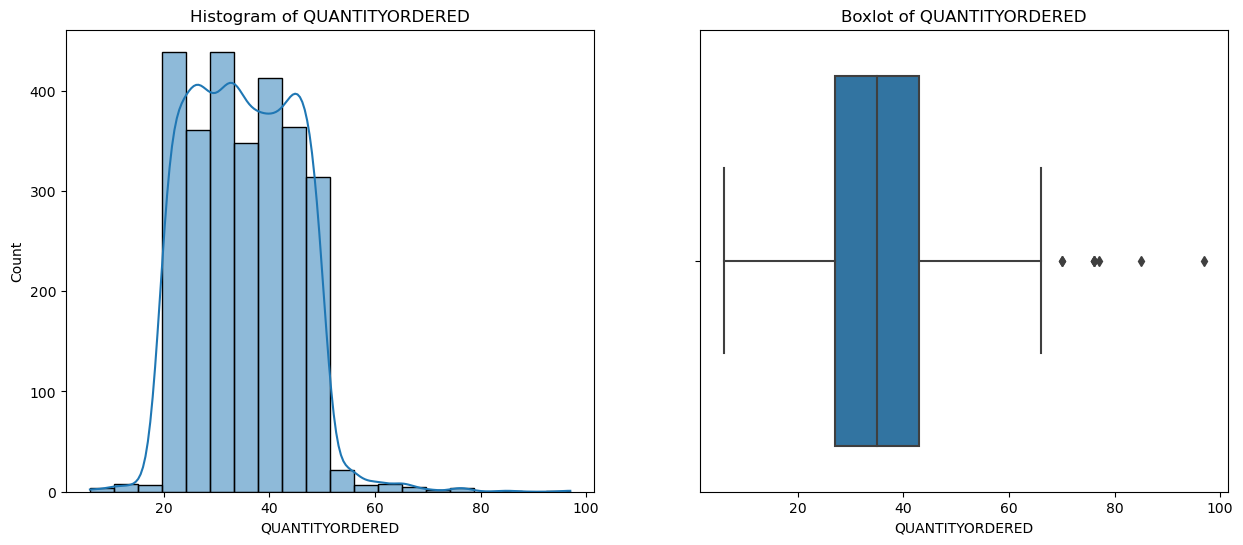

Description of PRICEEACH
----------------------------------------------------------------------------
count    2747.000000
mean      101.098952
std        42.042549
min        26.880000
25%        68.745000
50%        95.550000
75%       127.100000
max       252.870000
Name: PRICEEACH, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


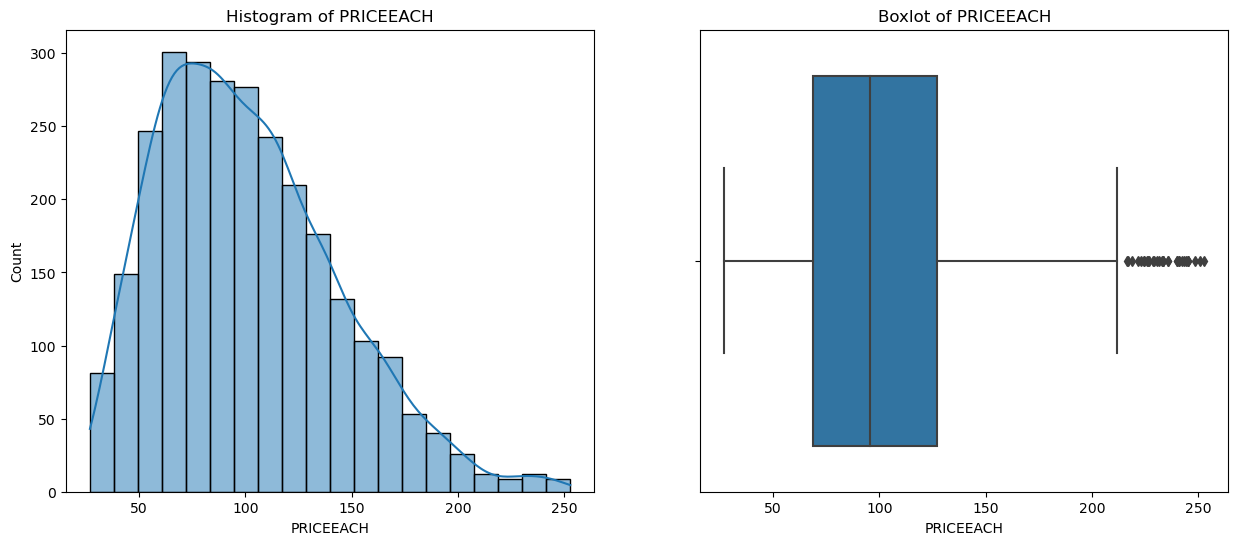

Description of ORDERLINENUMBER
----------------------------------------------------------------------------
count    2747.000000
mean        6.491081
std         4.230544
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        18.000000
Name: ORDERLINENUMBER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


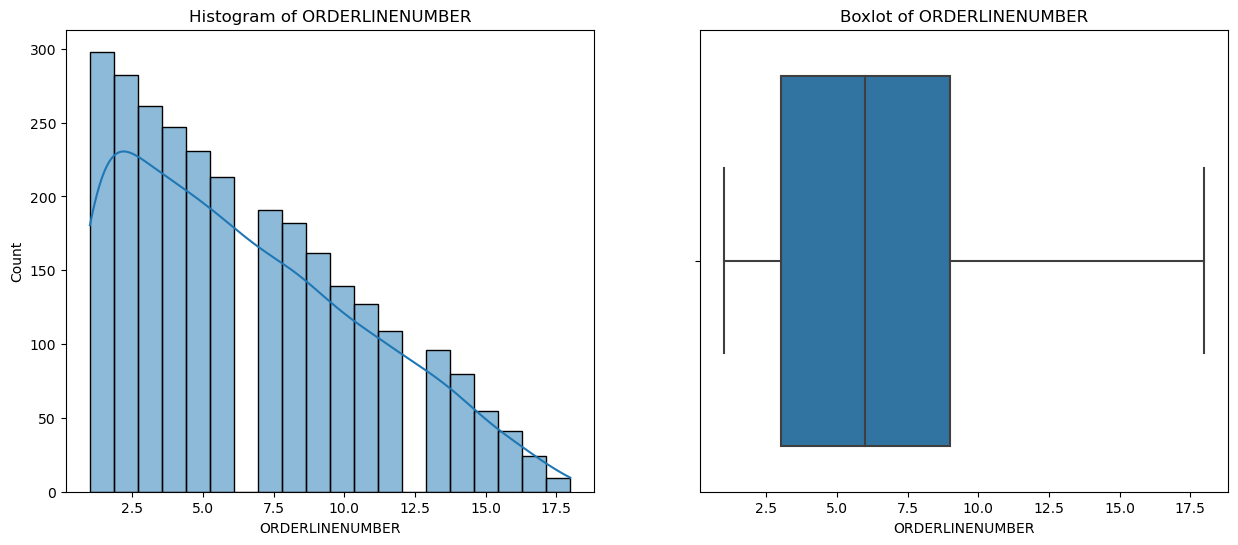

Description of SALES
----------------------------------------------------------------------------
count     2747.000000
mean      3553.055228
std       1838.947526
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


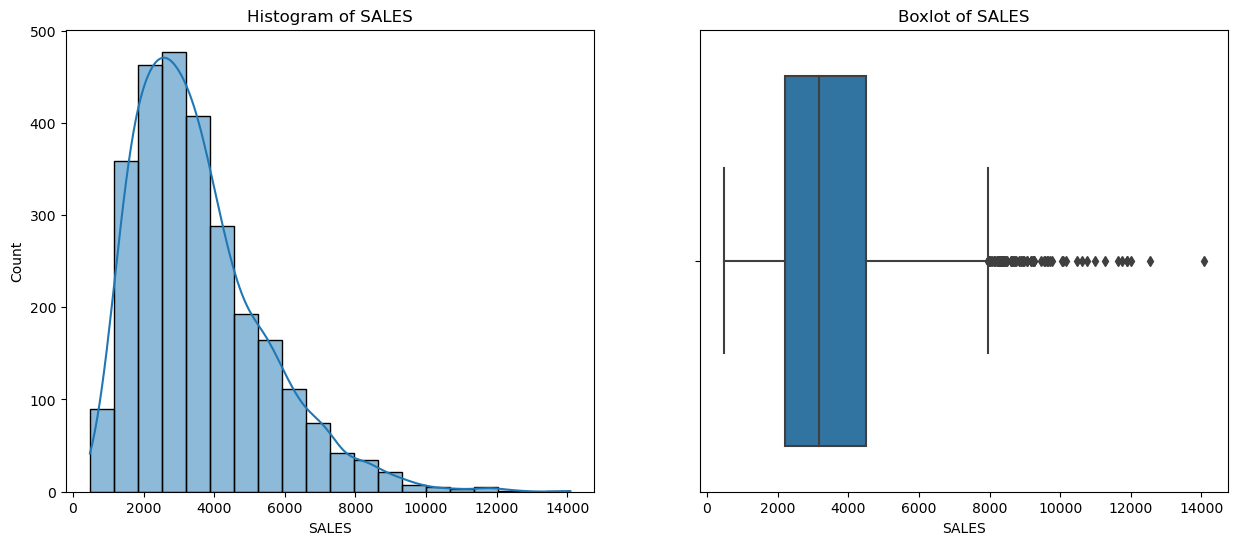

Description of MSRP
----------------------------------------------------------------------------
count    2747.000000
mean      100.691664
std        40.114802
min        33.000000
25%        68.000000
50%        99.000000
75%       124.000000
max       214.000000
Name: MSRP, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


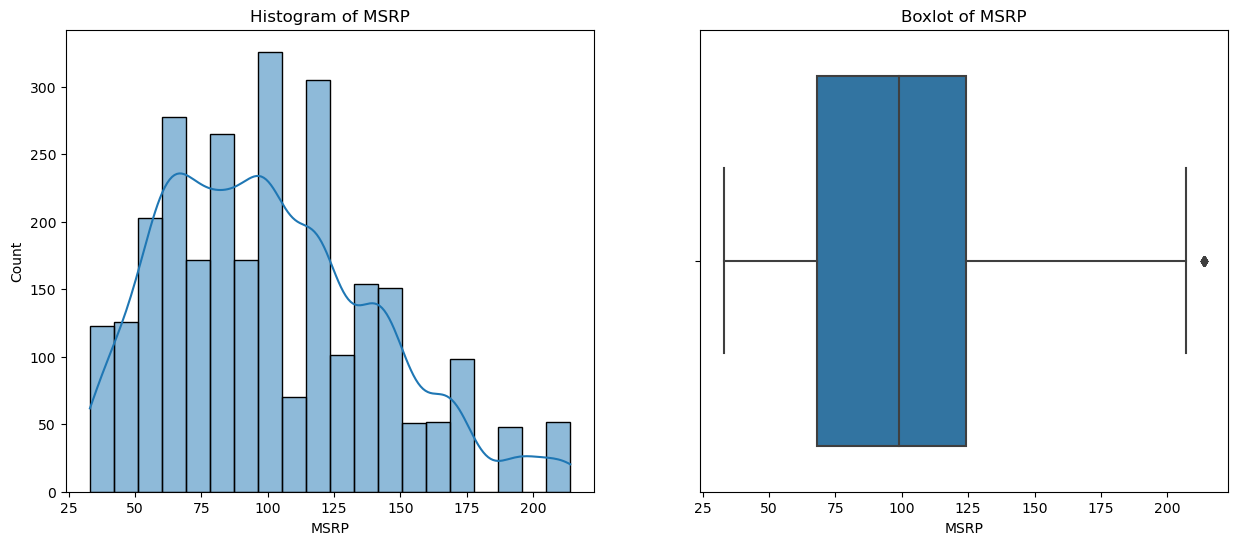

Description of DAYS_SINCE_LASTORDER
----------------------------------------------------------------------------
count    2747.000000
mean      597.188569
std       230.081328
min       215.000000
25%       410.000000
50%       556.000000
75%       784.000000
max      1090.000000
Name: DAYS_SINCE_LASTORDER, dtype: float64 ----------------------------------------------------------------------------
----------------------------------------------------------------------------


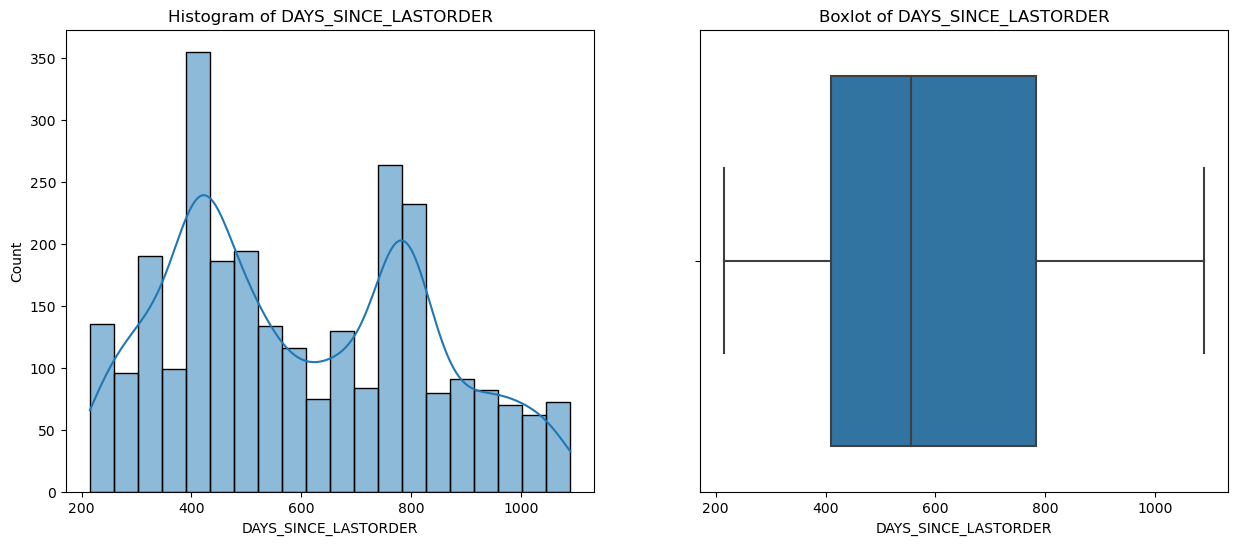

In [14]:
# analyse univariée pour chaque colonne catégorique
def univariateAnalysis_numeric(column, nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(), end=' ')
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    # Un graphique à barres montrant la distribution des catégories
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], bins=nbins, kde=True, ax=axes[0])
    axes[0].set_title("Histogram of " + column)
    # Un diagramme en secteurs affichant la répartition des catégories en pourcentage.
    print("----------------------------------------------------------------------------")
    sns.boxplot(x=df[column], ax=axes[1])
    axes[1].set_title("Boxlot of " + column )
    plt.show()
for x in df_num:
    univariateAnalysis_numeric(x,20)

In [15]:
#Analyse des 10 principaux pays
country_counts = df['COUNTRY'].value_counts()[:10]
fig = go.Figure(go.Funnel(y=country_counts.index,
    x=country_counts.values, textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Country Distribution',  template='plotly_white')
fig.show()

In [16]:
#Analyse des 10 principales villes
city_counts = df['CITY'].value_counts()[:10]
fig = go.Figure(go.Funnel(    y=city_counts.index,
    x=city_counts.values,      textinfo='value',
    marker={'color': px.colors.sequential.Blues_r} ))
fig.update_layout(title_text='Top 10 City Distribution', template='plotly_white')
fig.show()

In [17]:
#Analyse des 10 principaux clients par montant de ventes
top10customer = df.sort_values(by="SALES", ascending = False).head(5)
top10customer = df['CUSTOMERNAME'].value_counts()[:10]
fig = go.Figure(go.Funnel(  y=top10customer.index, x=top10customer.values,
    textinfo='value', marker={'color': px.colors.sequential.Blues_r}))
fig.update_layout(title_text='Top 10 Customer Distribution', template='plotly_white')
fig.show()

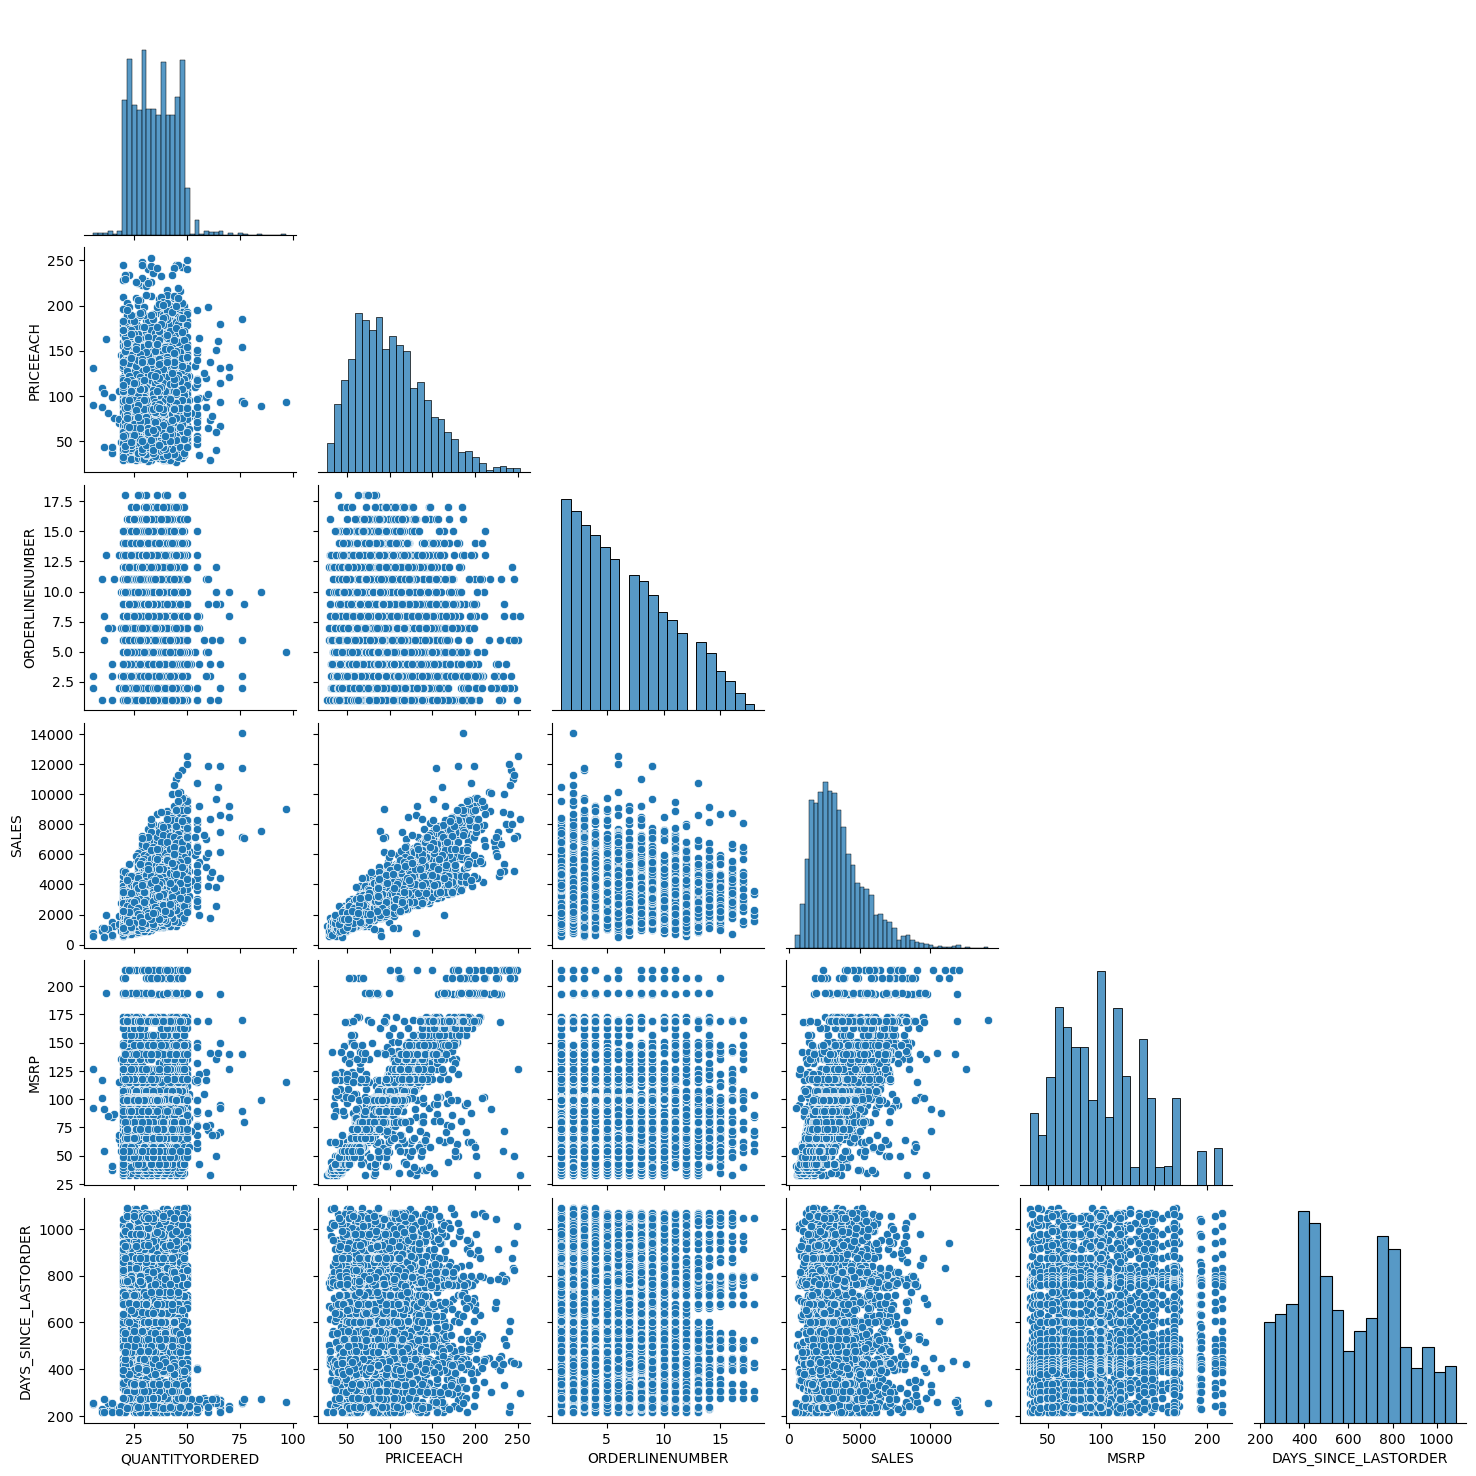

In [18]:
# la relation entre les paires de colonnes numériques
sns.pairplot(data=df_num, corner = True )

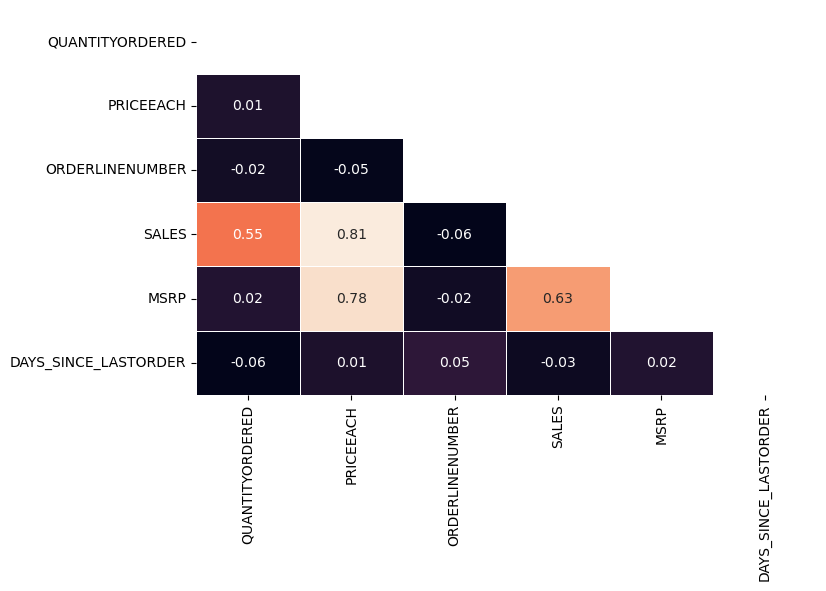

In [22]:
# visualiser la matrice de corrélation entre les colonnes numériques
corr = df_num.corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

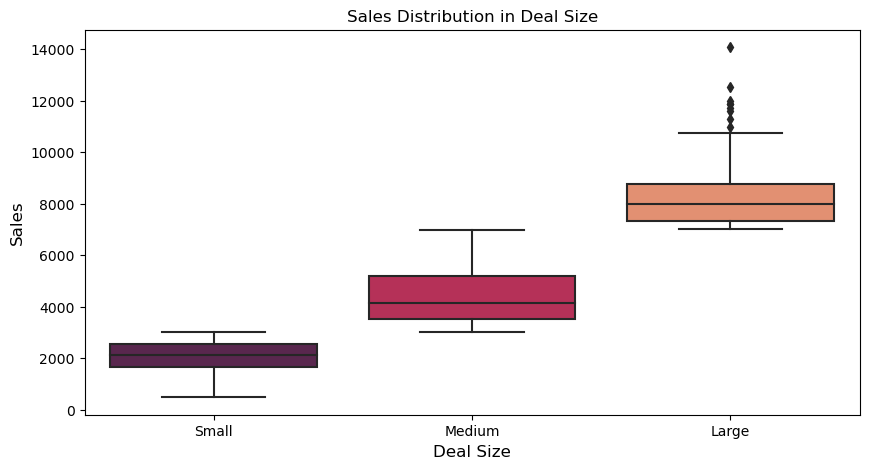

In [23]:
# analyser la distribution des ventes ('SALES') en fonction de la taille des transactions ('DEALSIZE')
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'DEALSIZE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

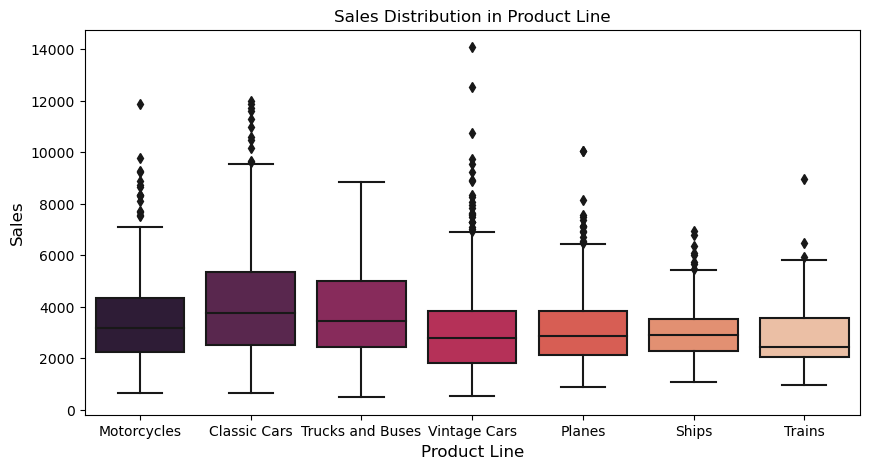

In [24]:
#analyser la distribution des ventes ('SALES') en fonction des lignes de produits ('PRODUCTLINE')
plt.figure(1 , figsize = (10,5))
sns.boxplot(x = 'PRODUCTLINE' , y = 'SALES' , data = df, palette='rocket')
plt.title('Sales Distribution in Product Line',fontsize=12)
plt.xlabel("Product Line", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.show()

In [25]:
# Extraire, mois, année, semestre et semaine de ORDERDATE
df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Week'] = df['ORDERDATE'].dt.isocalendar().week
df['Quarter'] = df['ORDERDATE'].dt.quarter

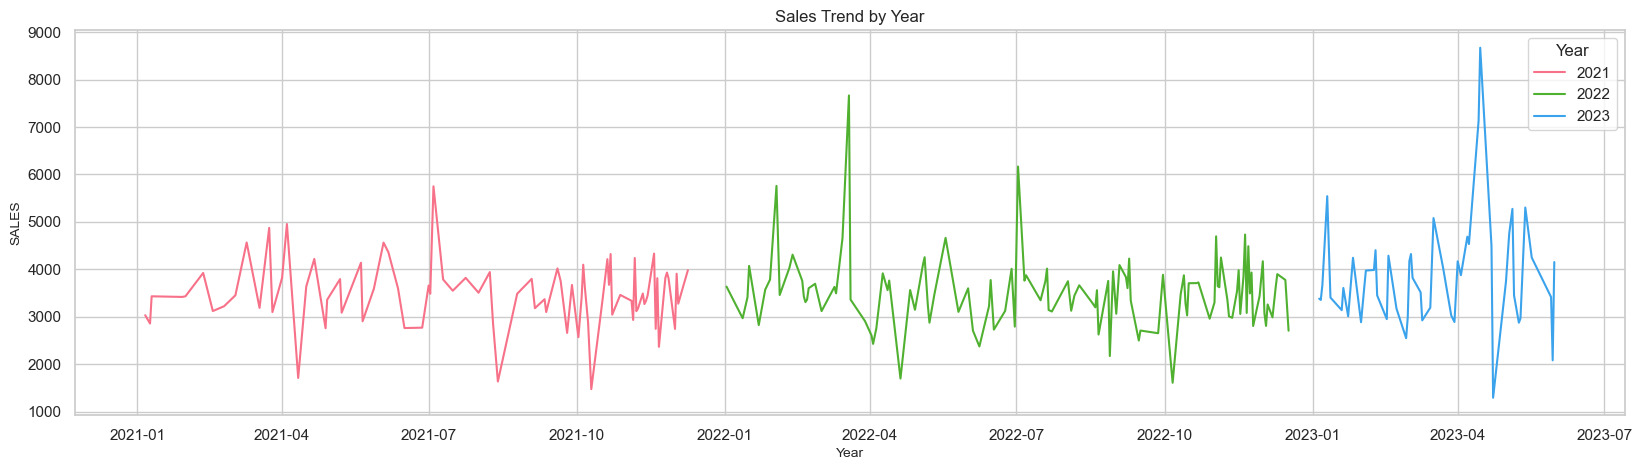

In [26]:
# tracer un graphique de tendance des ventes ('SALES') par année
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Year")
plt.xlabel("Year", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

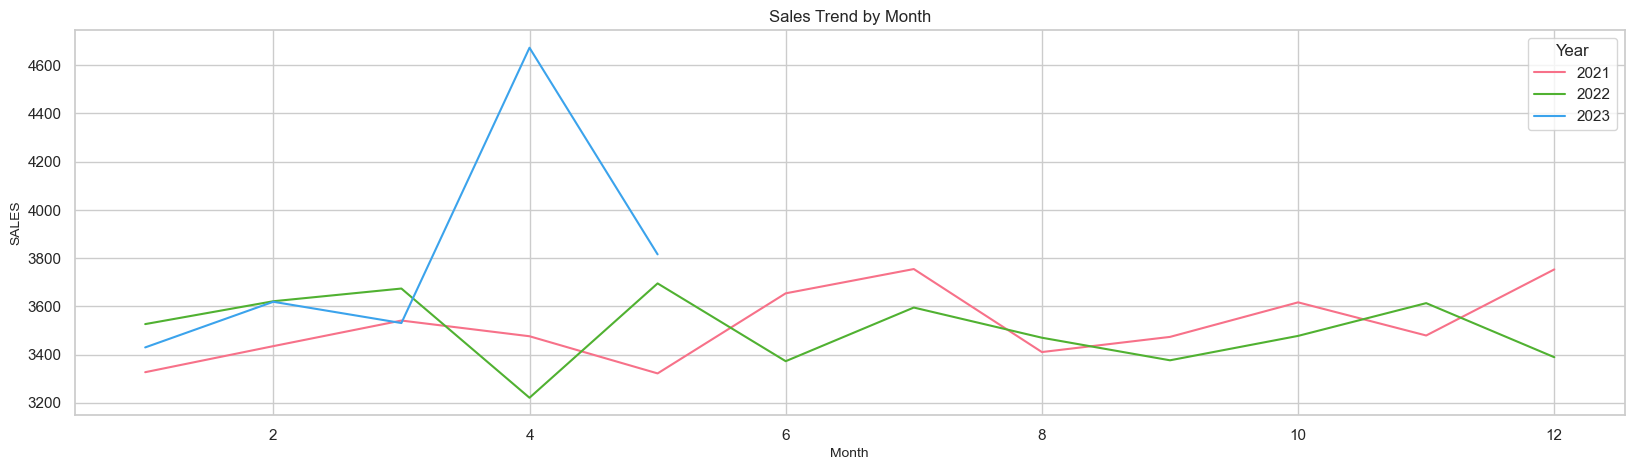

In [27]:
# tracer un graphique de tendance des ventes ('SALES') par mois 
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="Month", y="SALES", ci=None, hue="Year",palette=sns.color_palette("husl", len(df['Year'].unique())))
plt.title("Sales Trend by Month")
plt.xlabel("Month", fontsize=10)
plt.ylabel("SALES", fontsize=10)
plt.legend(title="Year", loc='best')
plt.show()

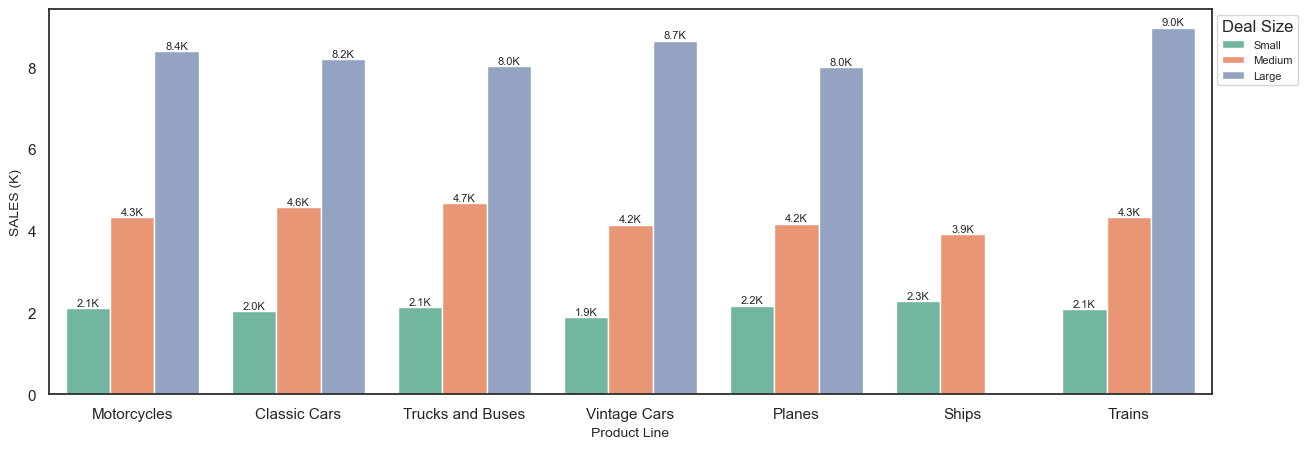

In [28]:
# comparer les ventes ('SALES') pour chaque ligne de produit ('PRODUCTLINE') avec la taille de l'offre ('DEALSIZE')
sns.set(style="white", rc={"figure.figsize": (15, 5)})
df["SALES (K)"] = df["SALES"] / 1000
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("SALES (K)", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
plt.legend(title="Deal Size", fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

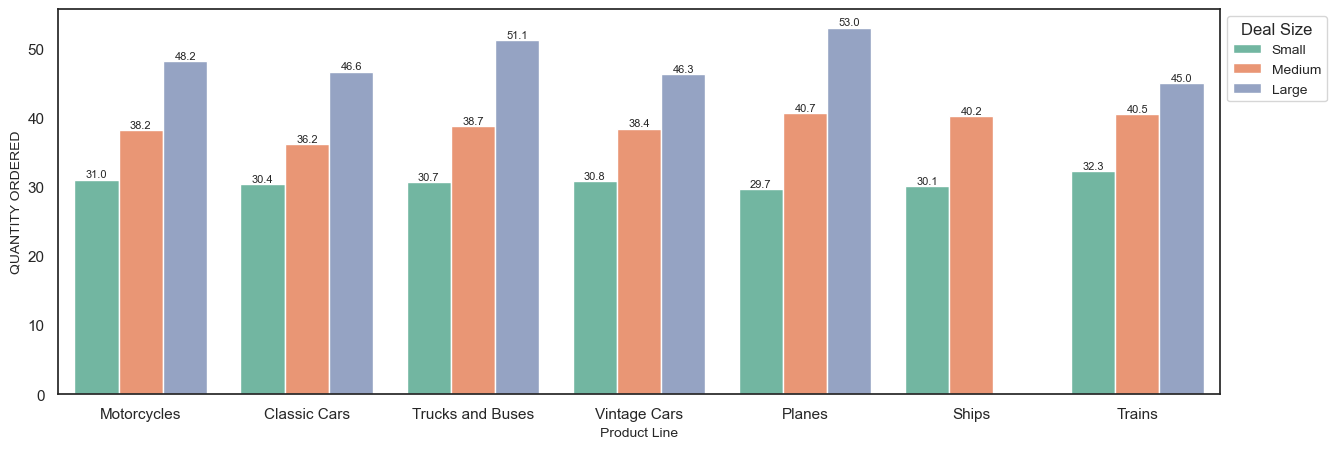

In [29]:
#Comparersla quantité commandée ('QUANTITYORDERED') pour chaque ligne de produit ('PRODUCTLINE') avec la taille de l'offre ('DEALSIZE') 

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="QUANTITYORDERED", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("QUANTITY ORDERED", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size", fontsize=10, loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

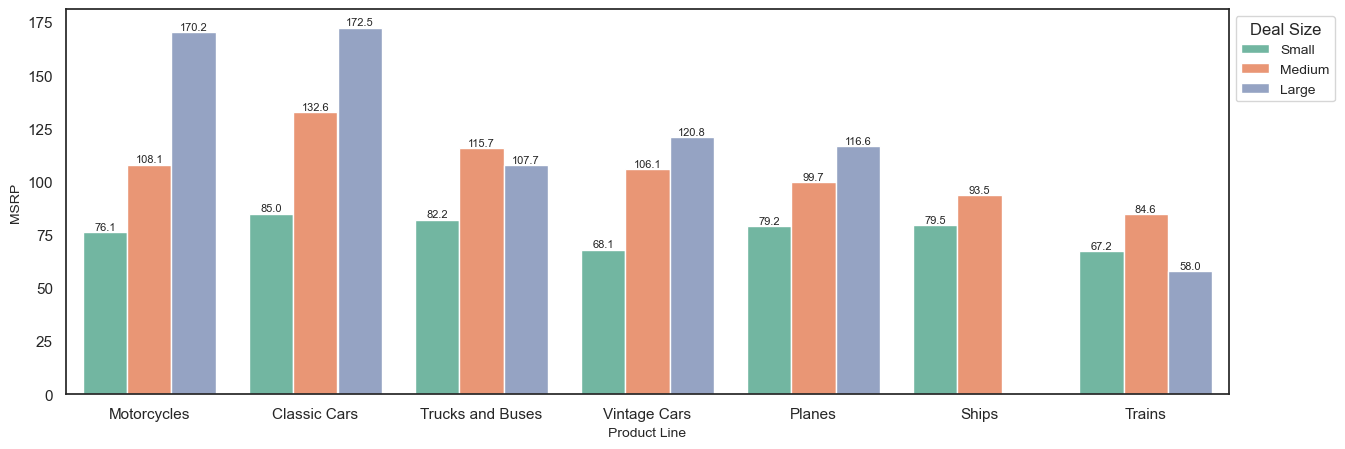

In [30]:
#Ccomparer le prix de vente conseillé ('MSRP') pour chaque ligne de produit ('PRODUCTLINE') avec la taille de l'offre ('DEALSIZE') 

sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="MSRP", hue="DEALSIZE", palette="Set2", ci=None)
plt.ylabel("MSRP", fontsize=10)
plt.xlabel("Product Line", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Deal Size",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

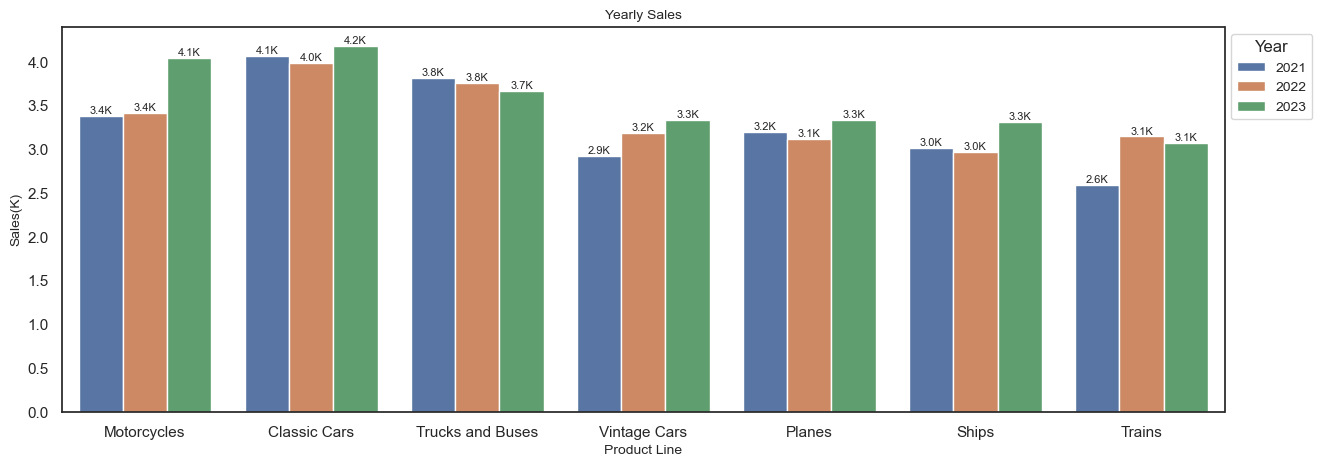

In [31]:
# comparer les ventes annuelles ('SALES (K)') pour chaque ligne de produit ('PRODUCTLINE') avec l'année ('Year') 
sns.set(style="white", rc={"figure.figsize": (15, 5)})
sns.barplot(data=df, x="PRODUCTLINE", y="SALES (K)", hue="Year",  ci=None)
plt.xlabel("Product Line", fontsize=10)
plt.ylabel("Sales(K)", fontsize=10)
plt.title("Yearly Sales", fontsize=10)
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
plt.legend(title="Year",fontsize=10,  loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

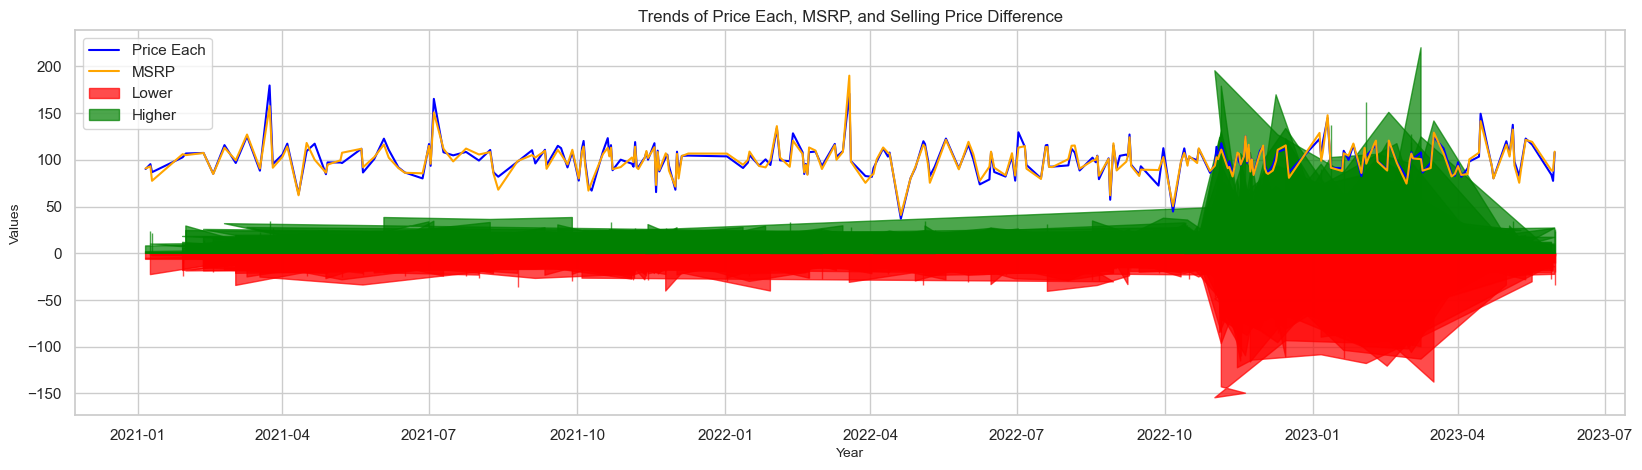

In [32]:
#tracer les tendances des prix ('PRICEEACH'), du prix suggéré par le fabricant ('MSRP')
# différence entre ces deux valeurs (nommée "SELLING_PRICE_DIFF"). 
df["SELLING_PRICE_DIFF"] =  df["PRICEEACH"]-df["MSRP"]
sns.set(style="whitegrid", rc={"figure.figsize": (20, 5)})
sns.lineplot(data=df, x="ORDERDATE", y="PRICEEACH", ci=None, label="Price Each", color='blue')
sns.lineplot(data=df, x="ORDERDATE", y="MSRP", ci=None, label="MSRP", color='orange')
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] < 0), color="red", alpha=0.7, label="Lower")
plt.fill_between(df["ORDERDATE"], df["SELLING_PRICE_DIFF"], where=(df["SELLING_PRICE_DIFF"] >= 0), color="green", alpha=0.7, label="Higher")
plt.title("Trends of Price Each, MSRP, and Selling Price Difference")
plt.xlabel("Year", fontsize=10)
plt.ylabel("Values", fontsize=10)
plt.legend(loc='best')
plt.show()

In [33]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Supposons que vous avez déterminé p, d et q
p = 1
d = 1
q = 1

# Divisez les données en train/test (en respectant l'ordre chronologique)
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Entraînez le modèle ARIMA sur les données d'entraînement
model = ARIMA(train['SALES'], order=(p, d, q))
model_fit = model.fit()

# Faites des prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test))

# Évaluez la performance du modèle
rmse = np.sqrt(mean_squared_error(test['SALES'], predictions))
print(f"RMSE: {rmse}")


RMSE: 1478.301787607429


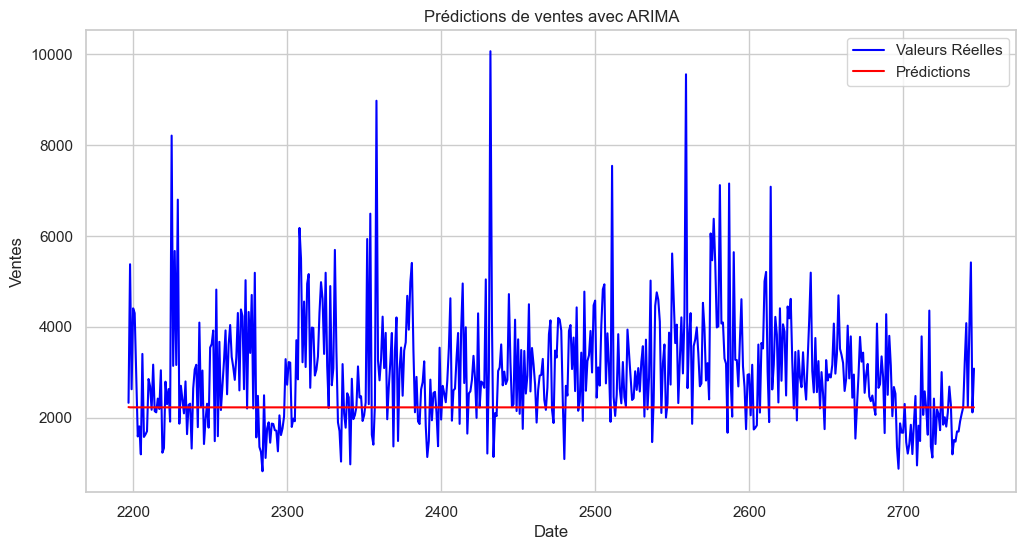

In [34]:
import matplotlib.pyplot as plt

# Tracer les prédictions et les valeurs réelles
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['SALES'], label='Valeurs Réelles', color='blue')
plt.plot(test.index, predictions, label='Prédictions', color='red')
plt.title('Prédictions de ventes avec ARIMA')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.legend()
plt.show()
